In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')

In [2]:
confirmed_cases = pd.read_csv('D:\Project\covid 19 outbreak prediction\dataset/time_series_covid_19_confirmed.csv')
deaths_reported = pd.read_csv('D:\Project\covid 19 outbreak prediction\dataset/time_series_covid_19_deaths.csv')
recovered_cases = pd.read_csv('D:\Project\covid 19 outbreak prediction\dataset/time_series_covid_19_recovered.csv')

cols = confirmed_cases.keys()

In [3]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

In [4]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

In [5]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [6]:
confirmed_sum

2896744

In [7]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [30]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [9]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [10]:
unique_countries = list(confirmed_cases['Country/Region'].unique())


In [11]:
country_confirmed_cases = []
no_cases = []

for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

print('Confirmed Cases by countries/regions: ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

unique_provinces = list(confirmed_cases['Province/State'].unique())
outliers = ['United Kingdom','Denmark','France']
# for i in outliers:
#     unique_provinces.remove(i)

Confirmed Cases by countries/regions: 
US: 938154 cases
Spain: 223759 cases
Italy: 195351 cases
France: 161644 cases
Germany: 156513 cases
United Kingdom: 149569 cases
Turkey: 107773 cases
Iran: 89328 cases
China: 83909 cases
Russia: 74588 cases
Brazil: 59324 cases
Canada: 45491 cases
Belgium: 45325 cases
Netherlands: 37384 cases
Switzerland: 28894 cases
India: 26283 cases
Peru: 25331 cases
Portugal: 23392 cases
Ecuador: 22719 cases
Ireland: 18561 cases
Sweden: 18177 cases
Saudi Arabia: 16299 cases
Israel: 15298 cases
Austria: 15148 cases
Mexico: 13842 cases
Japan: 13231 cases
Chile: 12858 cases
Pakistan: 12723 cases
Singapore: 12693 cases
Poland: 11273 cases
Korea, South: 10728 cases
Romania: 10635 cases
United Arab Emirates: 9813 cases
Belarus: 9590 cases
Qatar: 9358 cases
Denmark: 8643 cases
Indonesia: 8607 cases
Ukraine: 8125 cases
Norway: 7499 cases
Czechia: 7352 cases
Philippines: 7294 cases
Australia: 6694 cases
Serbia: 6630 cases
Dominican Republic: 5926 cases
Malaysia: 5742 ca

In [12]:
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases >0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

Australian Capital Territory: 106 cases
New South Wales: 2994 cases
Northern Territory: 28 cases
Queensland: 1026 cases
South Australia: 438 cases
Tasmania: 207 cases
Victoria: 1346 cases
Western Australia: 549 cases
Alberta: 4233 cases
British Columbia: 1948 cases
Manitoba: 267 cases
New Brunswick: 118 cases
Newfoundland and Labrador: 257 cases
Ontario: 15012 cases
Prince Edward Island: 26 cases
Quebec: 23267 cases
Saskatchewan: 349 cases
Anhui: 991 cases
Beijing: 593 cases
Chongqing: 579 cases
Fujian: 355 cases
Gansu: 139 cases
Guangdong: 1586 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 168 cases
Hebei: 328 cases
Heilongjiang: 935 cases
Henan: 1276 cases
Hong Kong: 1037 cases
Hubei: 68128 cases
Hunan: 1019 cases
Inner Mongolia: 198 cases
Jiangsu: 653 cases
Jiangxi: 937 cases
Jilin: 109 cases
Liaoning: 146 cases
Macau: 45 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 286 cases
Shandong: 787 cases
Shanghai: 642 cases
Shanxi: 197 cases
Sichuan: 561 cases
Tianjin: 190 cases


In [13]:
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

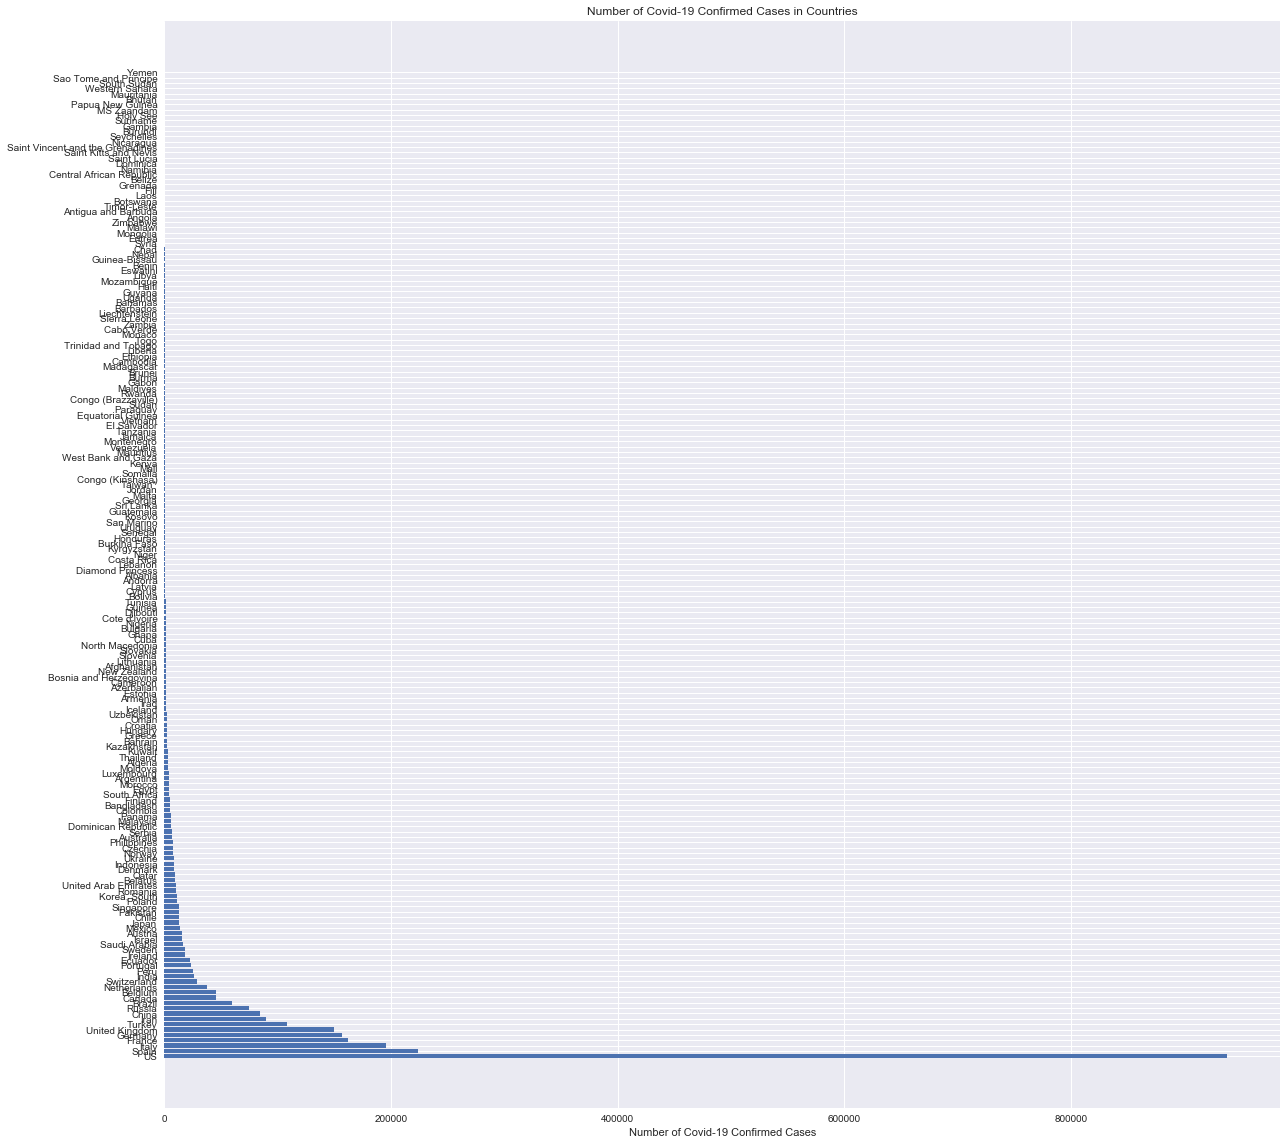

In [14]:
plt.figure(figsize=(20,20))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

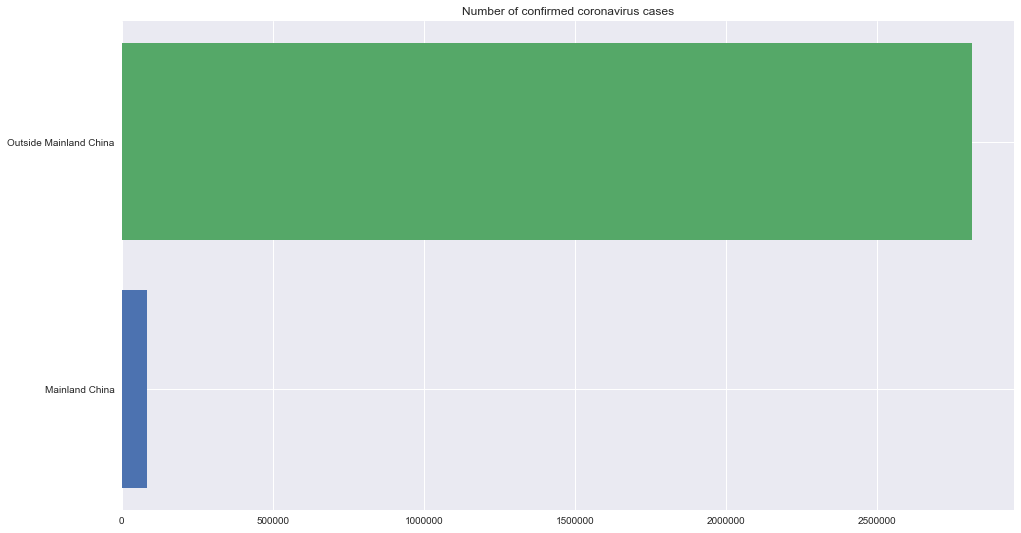

In [15]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of confirmed coronavirus cases')
plt.show()

In [16]:
print('Outside Mainland China {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 2812835 cases
Mainland China 83909 cases
Total: 2896744 cases


In [17]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[10:])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

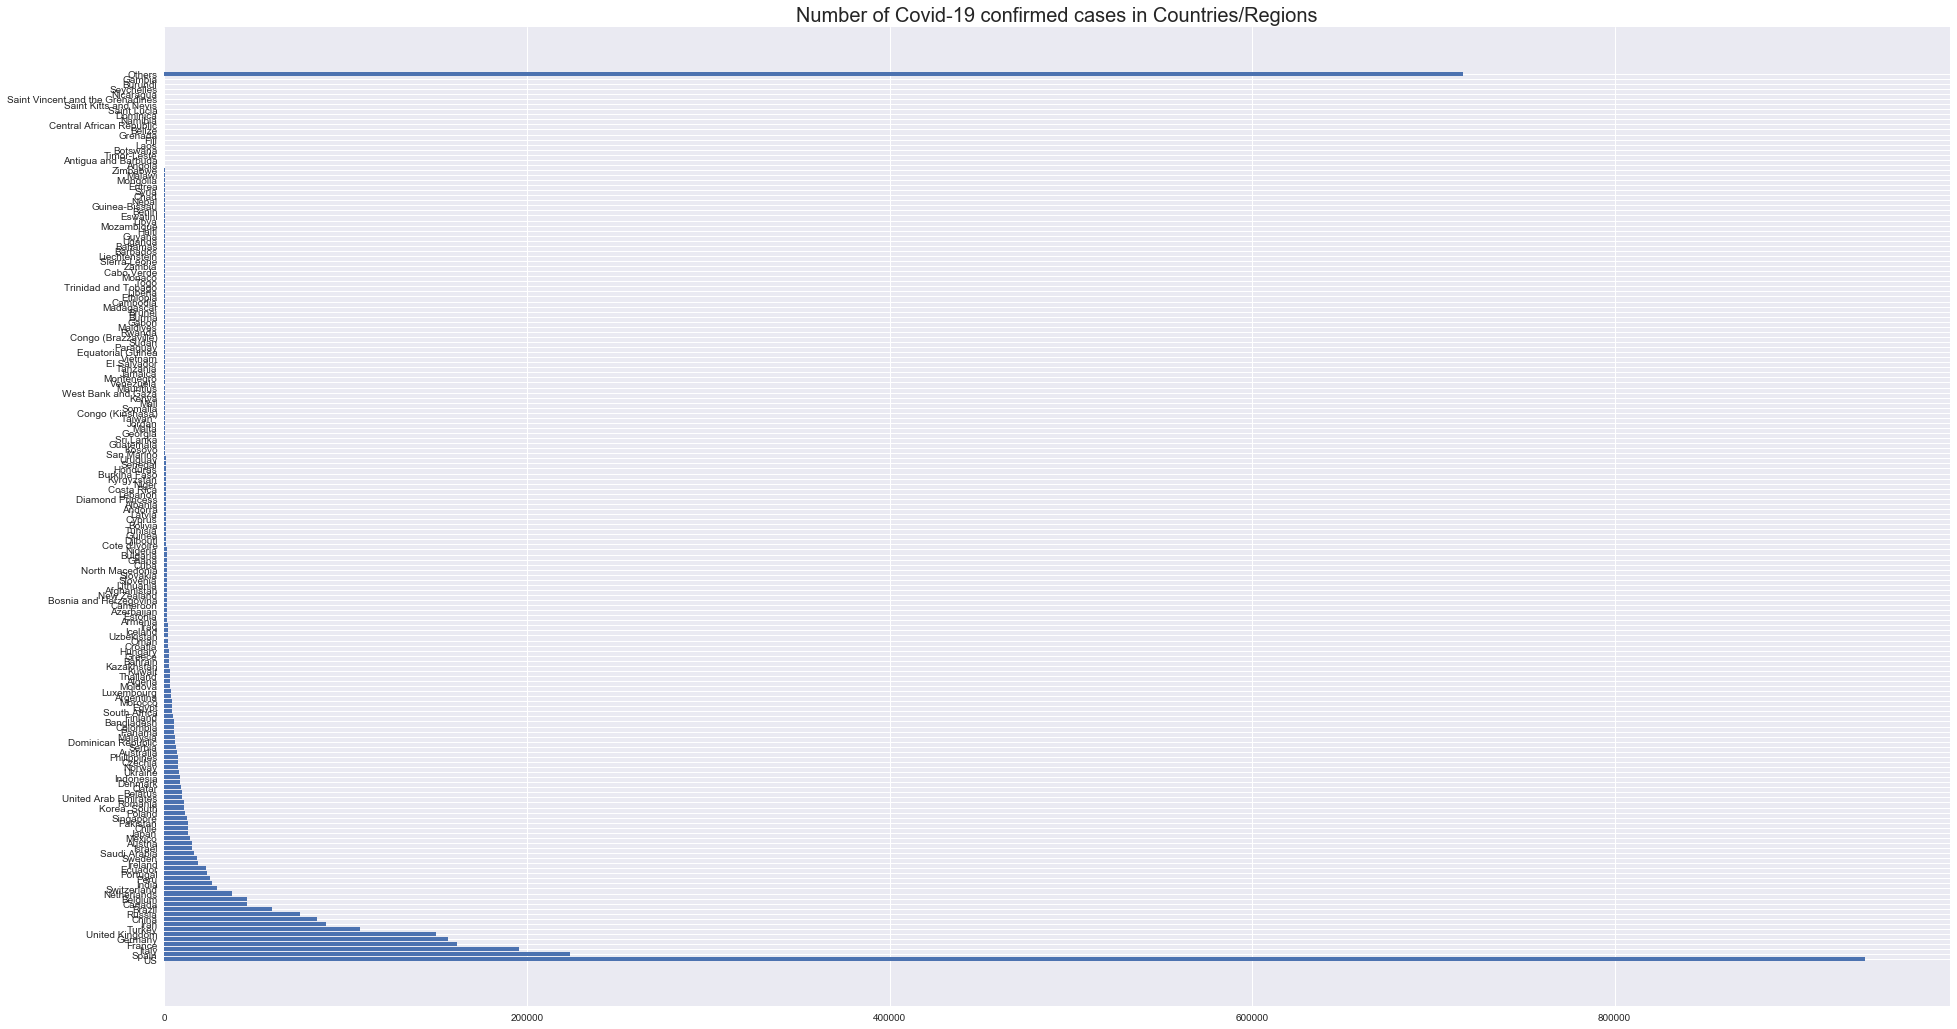

In [18]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 confirmed cases in Countries/Regions', size=20)
plt.show()

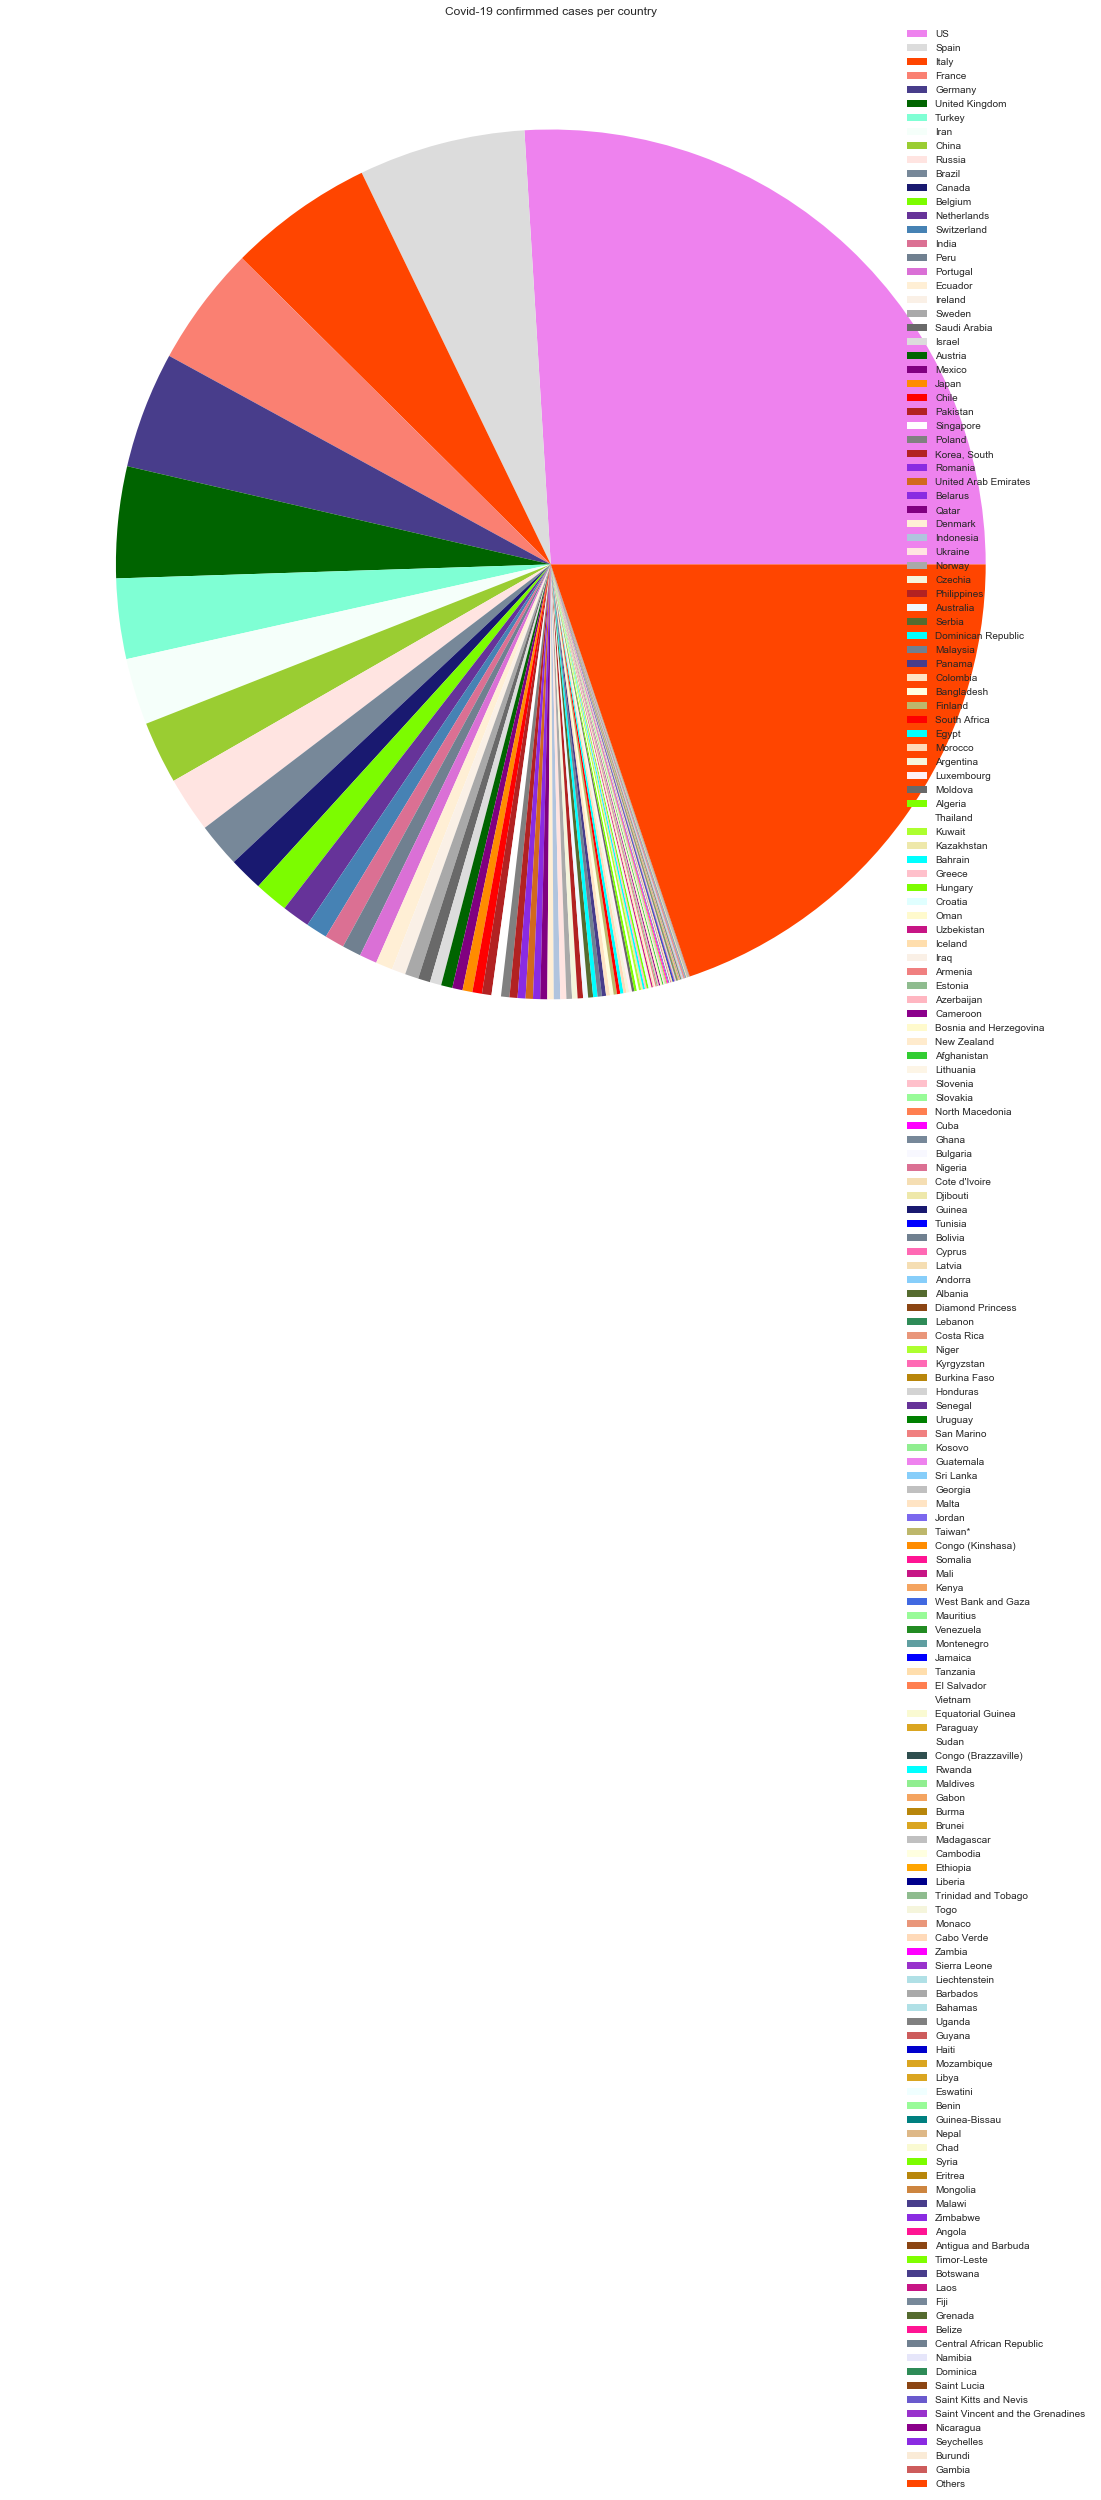

In [19]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title("Covid-19 confirmmed cases per country")
plt.pie(visual_confirmed_cases,colors= c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

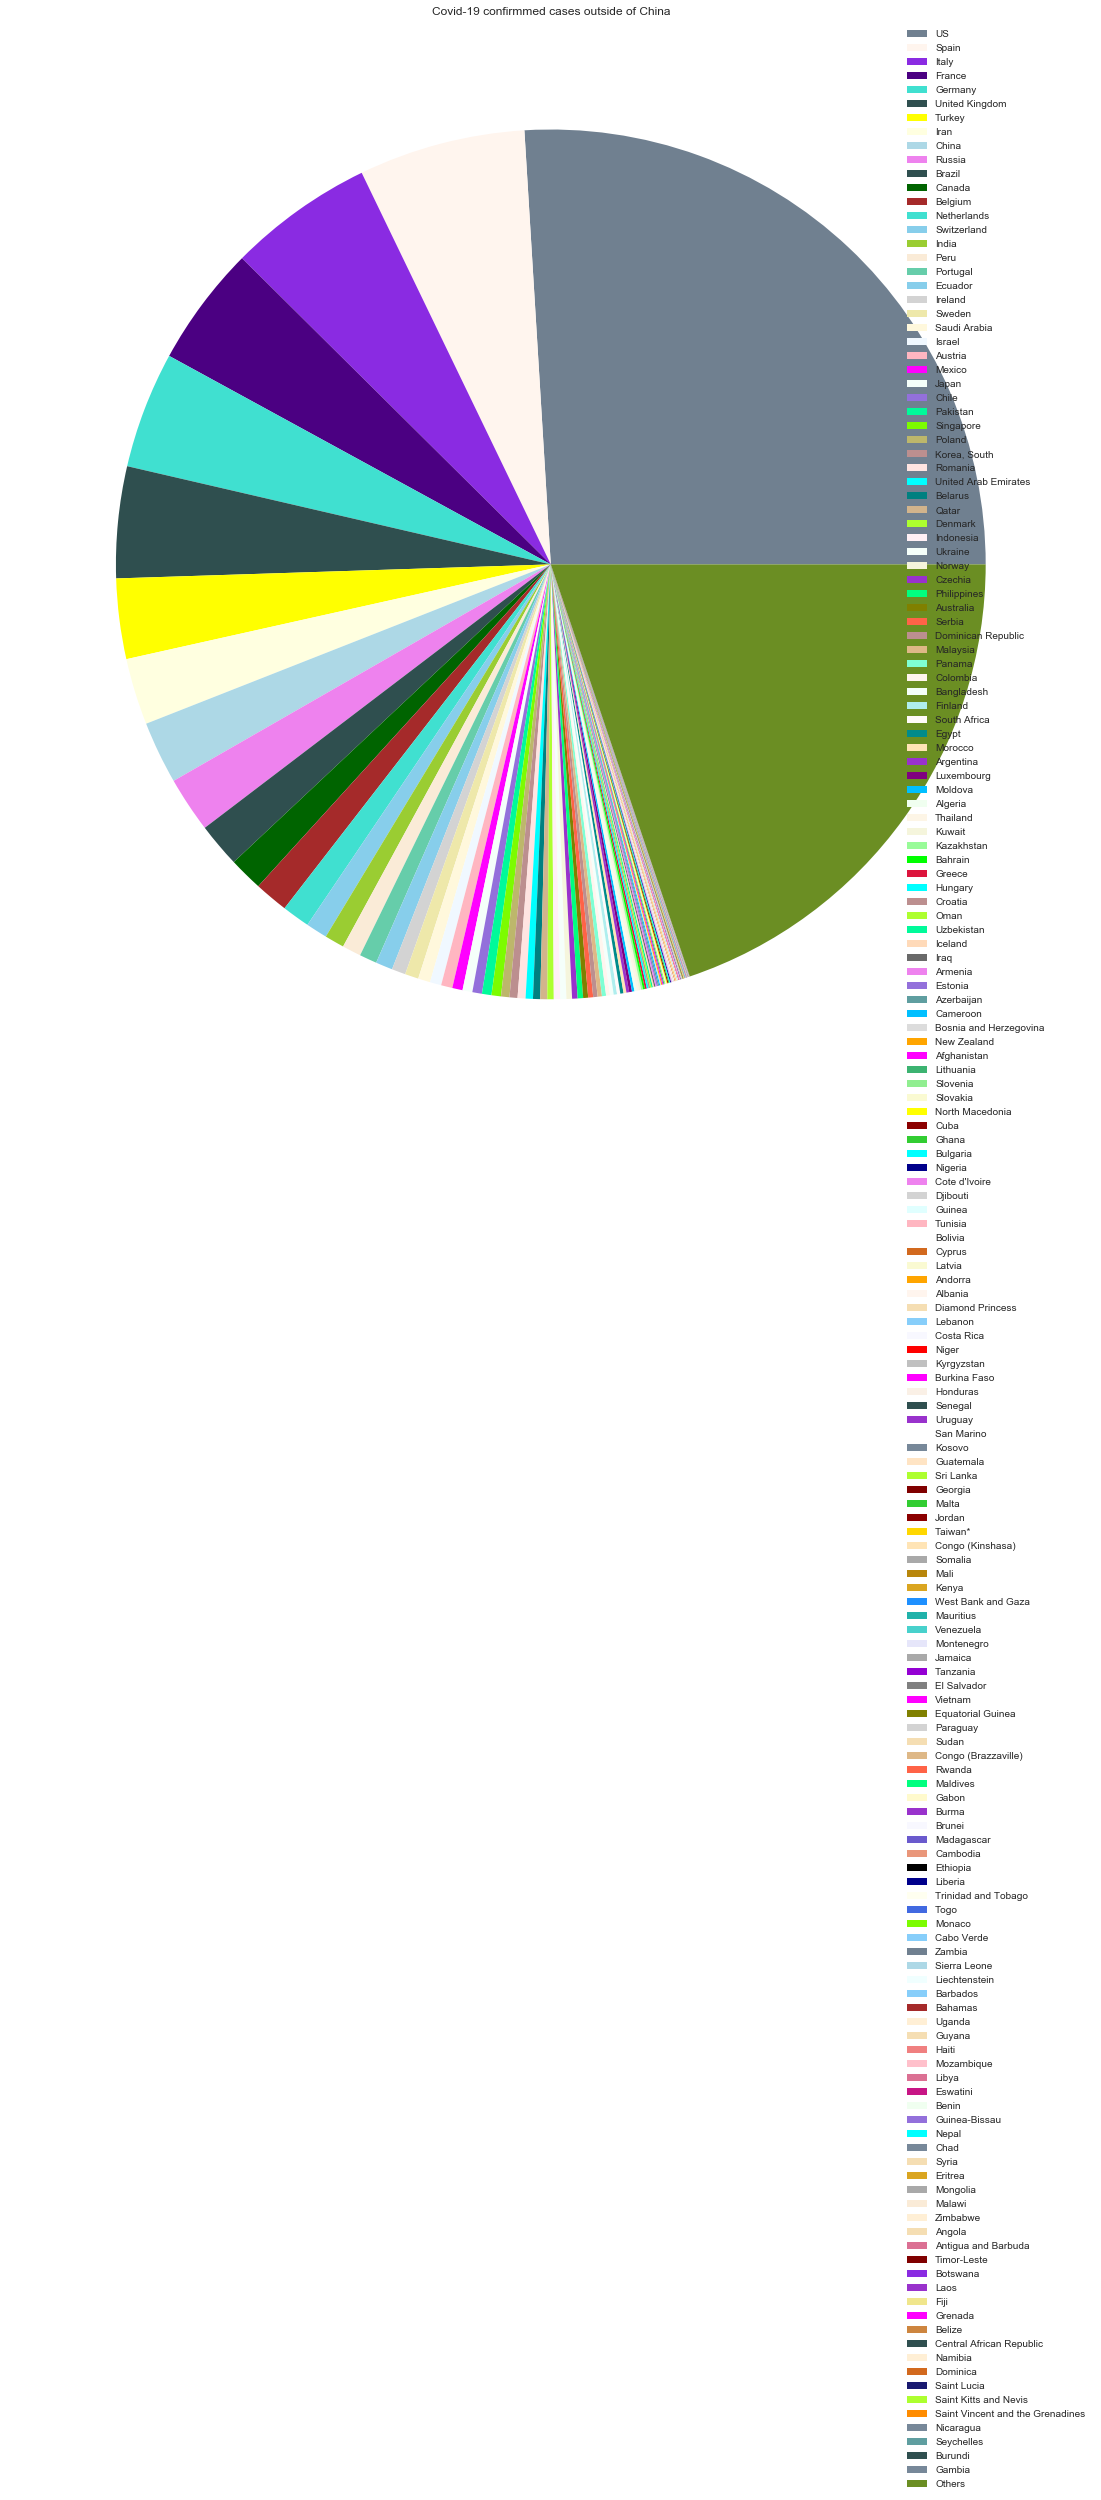

In [20]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title("Covid-19 confirmmed cases outside of China")
plt.pie(visual_confirmed_cases,colors= c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [21]:
kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking= [True, False]
svm_grid = {'kernel': kernel,'C': c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}
svm = SVR(kernel='poly')
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='poly',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [22]:
print(svm_search.best_params_)

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'C': 0.01}


In [25]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [26]:
svm_confirmed

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
svm_pred

array([1.96507801e+03, 1.96746586e+03, 1.98418076e+03, 2.02954980e+03,
       2.11790003e+03, 2.26355851e+03, 2.48085232e+03, 2.78410851e+03,
       3.18765415e+03, 3.70581630e+03, 4.35292202e+03, 5.14329839e+03,
       6.09127246e+03, 7.21117130e+03, 8.51732198e+03, 1.00240515e+04,
       1.17456871e+04, 1.36965556e+04, 1.58909843e+04, 1.83433001e+04,
       2.10678301e+04, 2.40789014e+04, 2.73908410e+04, 3.10179761e+04,
       3.49746336e+04, 3.92751407e+04, 4.39338243e+04, 4.89650117e+04,
       5.43830297e+04, 6.02022056e+04, 6.64368663e+04, 7.31013389e+04,
       8.02099505e+04, 8.77770282e+04, 9.58168990e+04, 1.04343890e+05,
       1.13372328e+05, 1.22916541e+05, 1.32990855e+05, 1.43609597e+05,
       1.54787095e+05, 1.66537675e+05, 1.78875665e+05, 1.91815392e+05,
       2.05371182e+05, 2.19557363e+05, 2.34388263e+05, 2.49878207e+05,
       2.66041523e+05, 2.82892538e+05, 3.00445579e+05, 3.18714974e+05,
       3.37715049e+05, 3.57460131e+05, 3.77964547e+05, 3.99242625e+05,
      

MAE: 725277.4349092336
MSE: 540143138876.04004


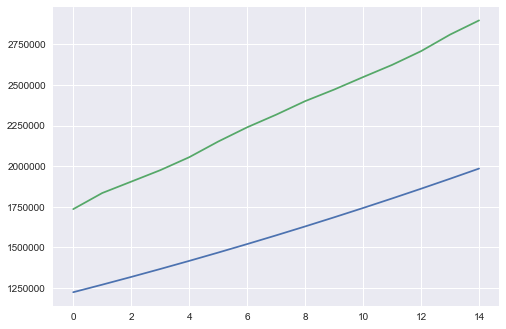

In [28]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

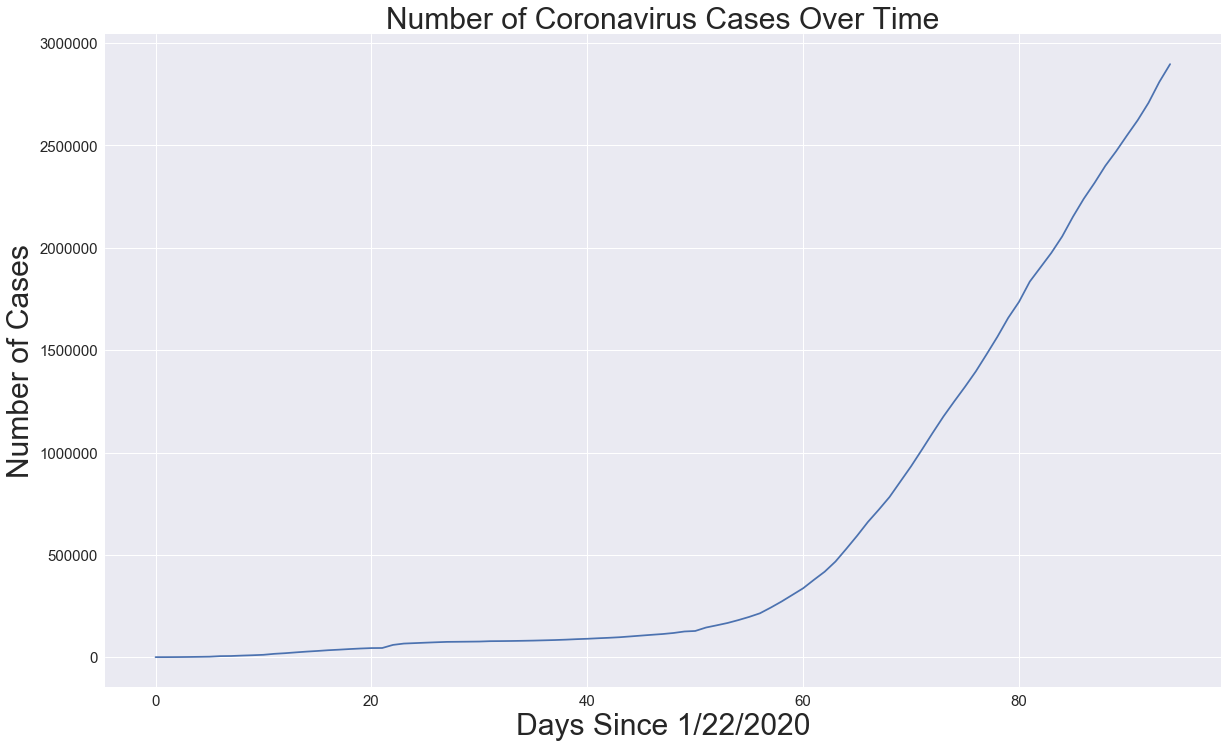

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

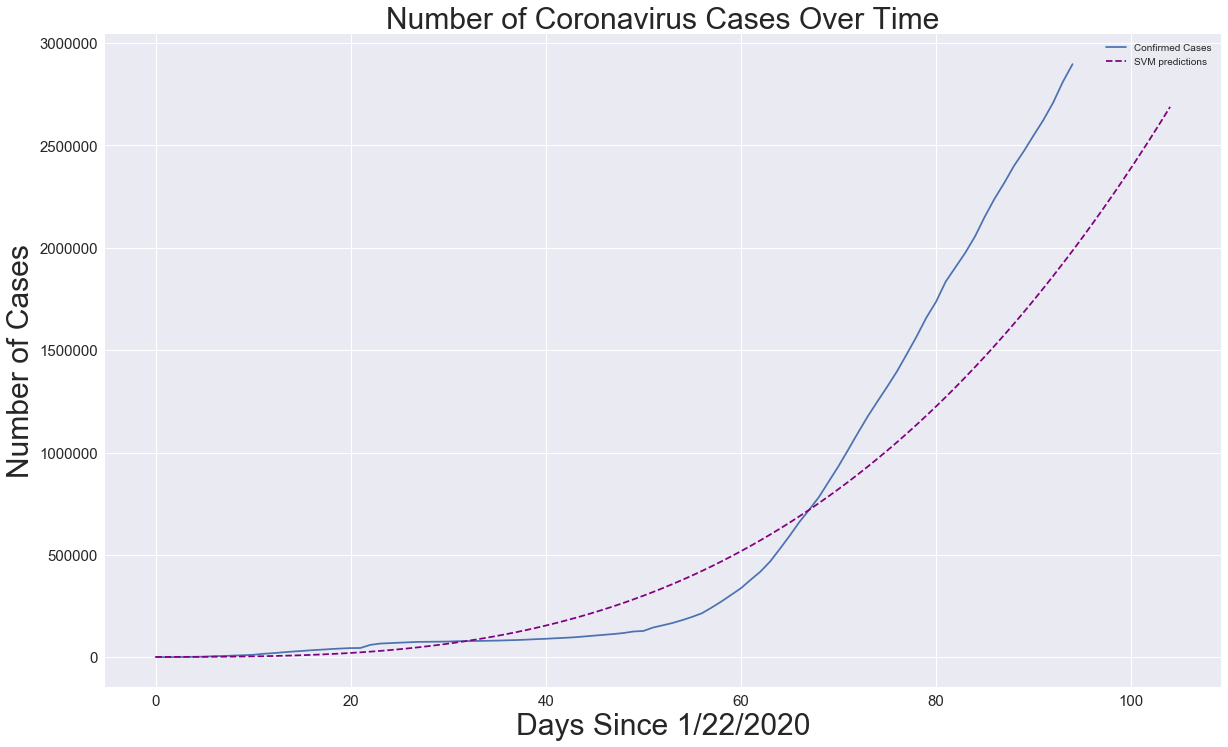

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [37]:
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('04/26/2020', 2049242.836445581),
 ('04/27/2020', 2114576.636414676),
 ('04/28/2020', 2181285.8345337966),
 ('04/29/2020', 2249384.757866958),
 ('04/30/2020', 2318887.7334782565),
 ('05/01/2020', 2389809.088431742),
 ('05/02/2020', 2462163.1497914707),
 ('05/03/2020', 2535964.2446215274),
 ('05/04/2020', 2611226.699985966),
 ('05/05/2020', 2687964.842948825)}

In [36]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1325534.625644632
MSE: 1841120977977.0764


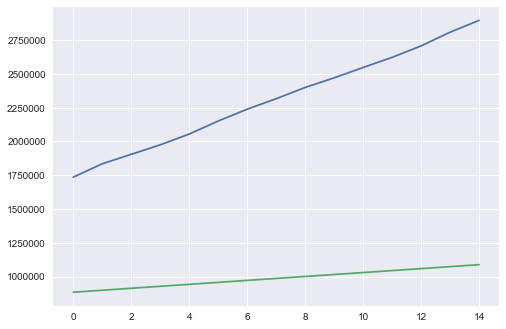

In [38]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

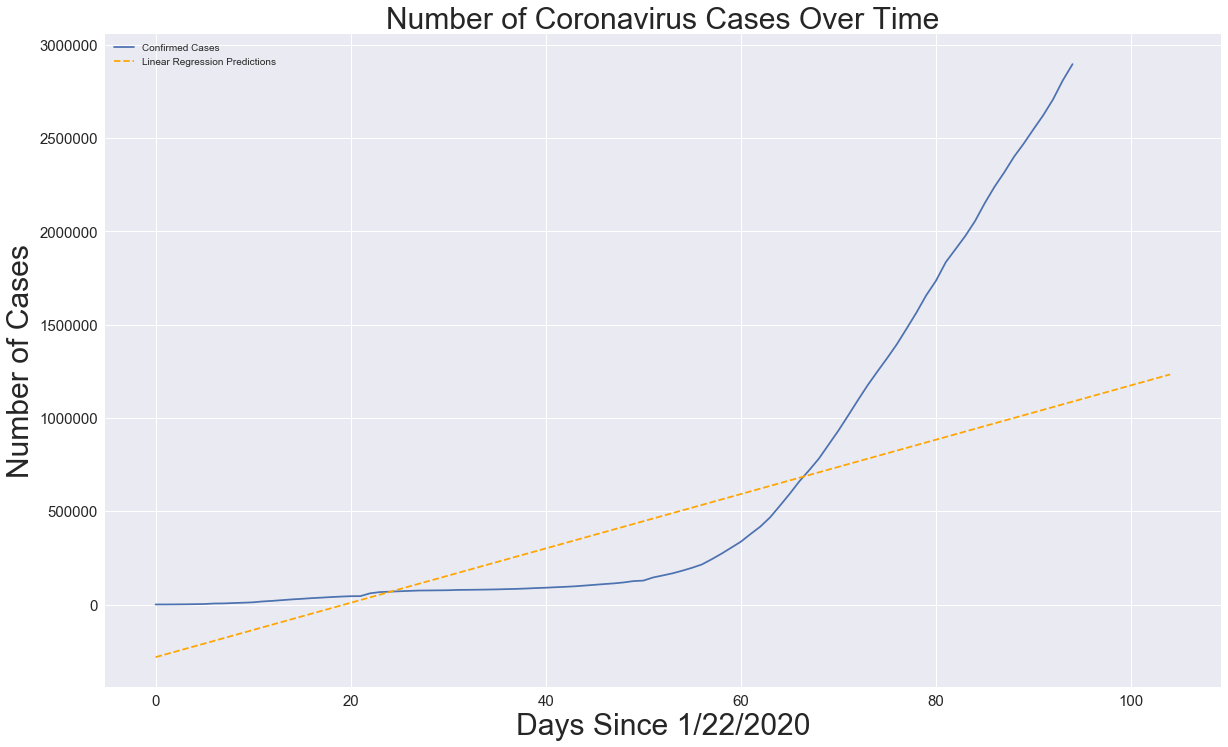

In [39]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [40]:
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[1102308.30056259]
 [1116878.84967182]
 [1131449.39878106]
 [1146019.9478903 ]
 [1160590.49699953]
 [1175161.04610877]
 [1189731.595218  ]
 [1204302.14432724]
 [1218872.69343647]
 [1233443.24254571]]


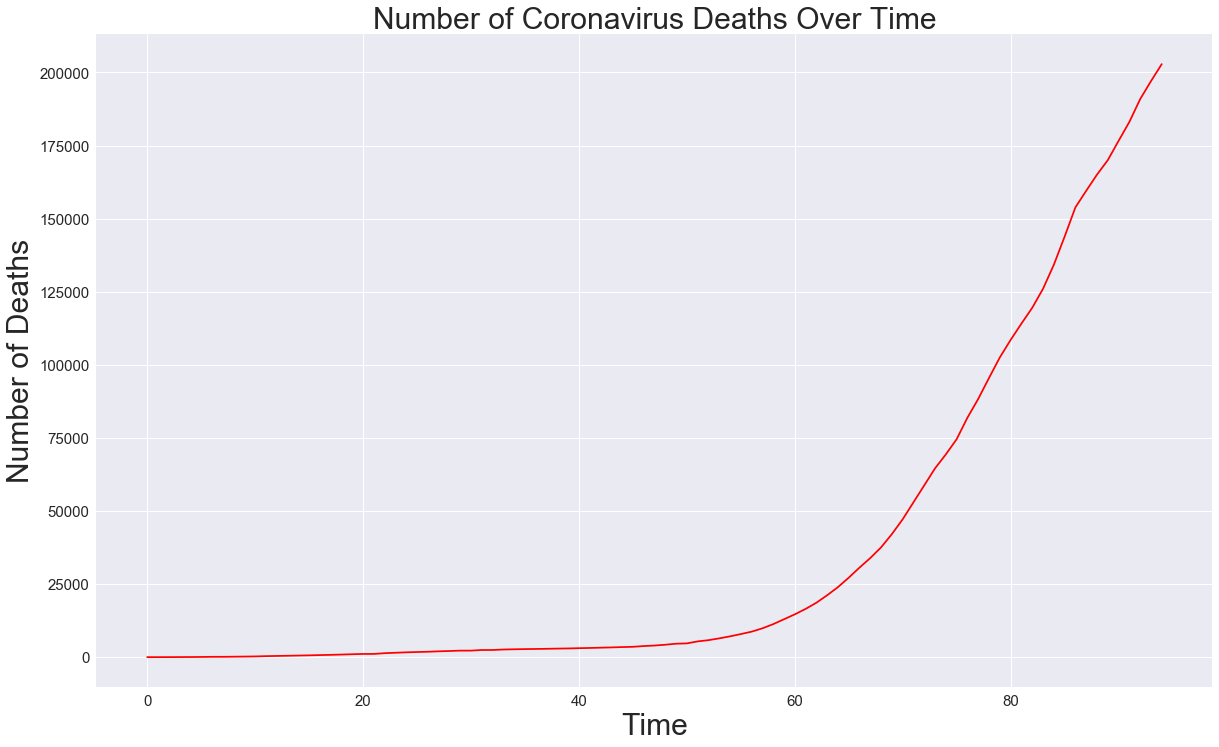

In [41]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

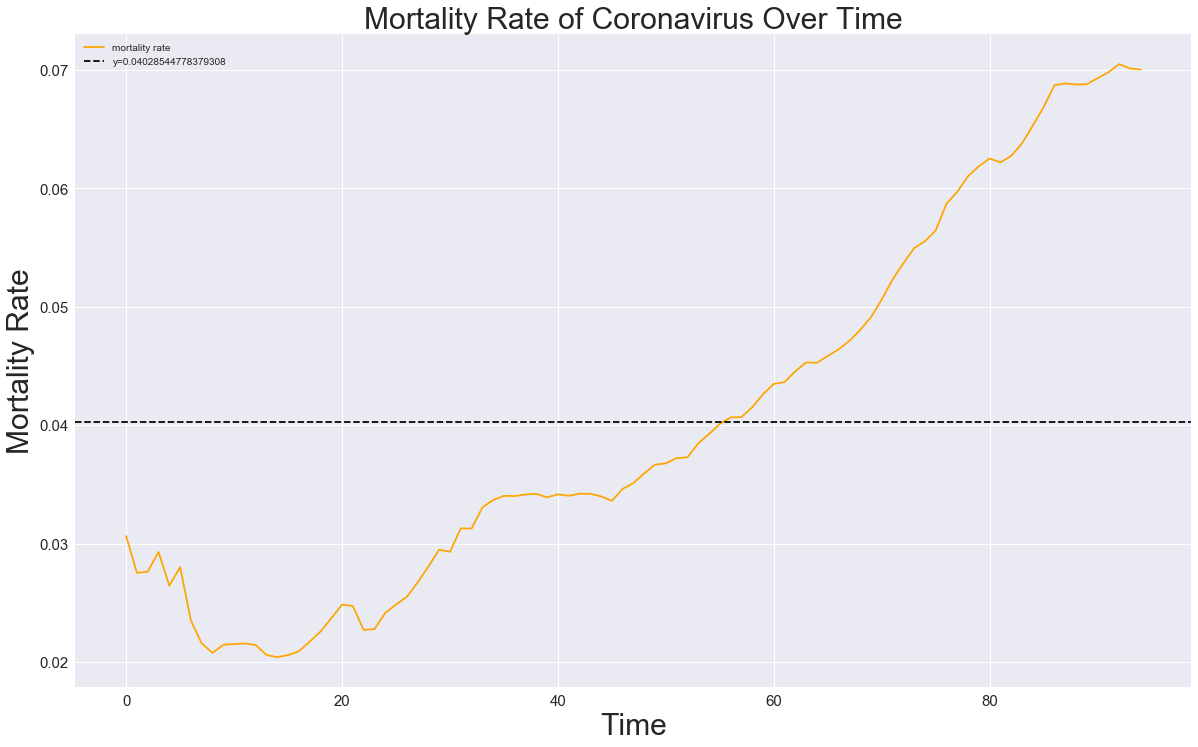

In [42]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

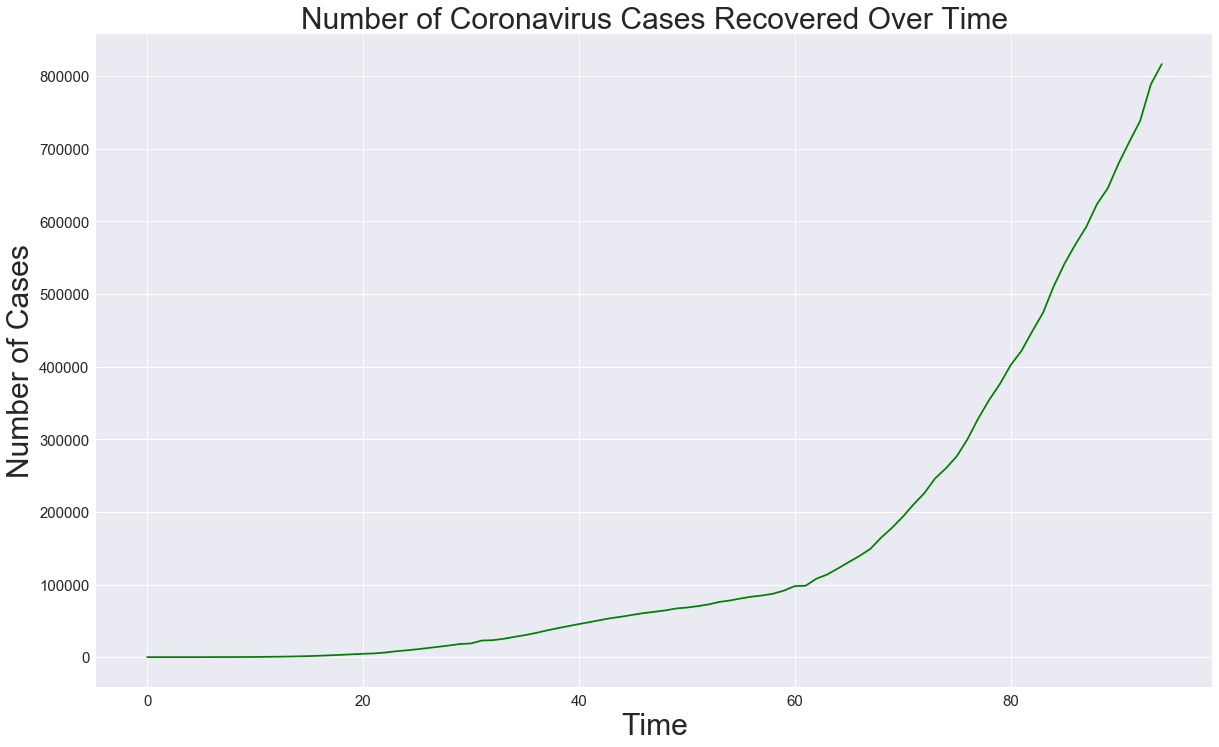

In [43]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

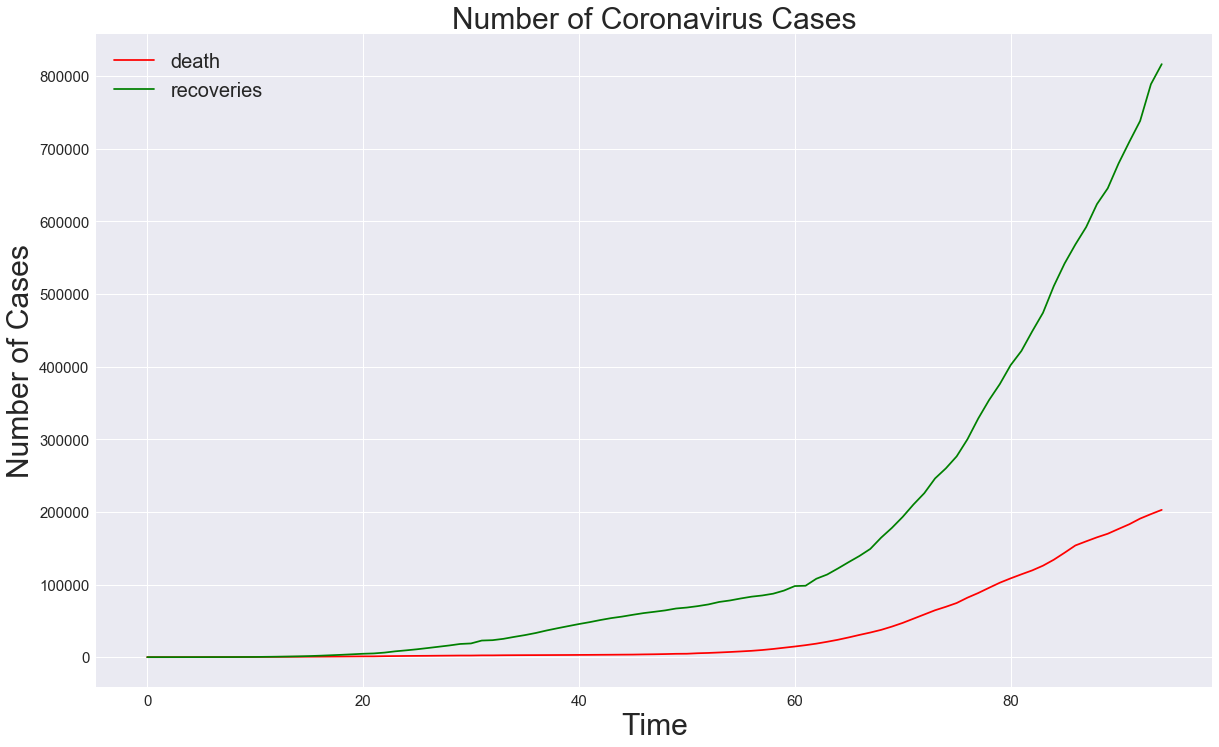

In [44]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

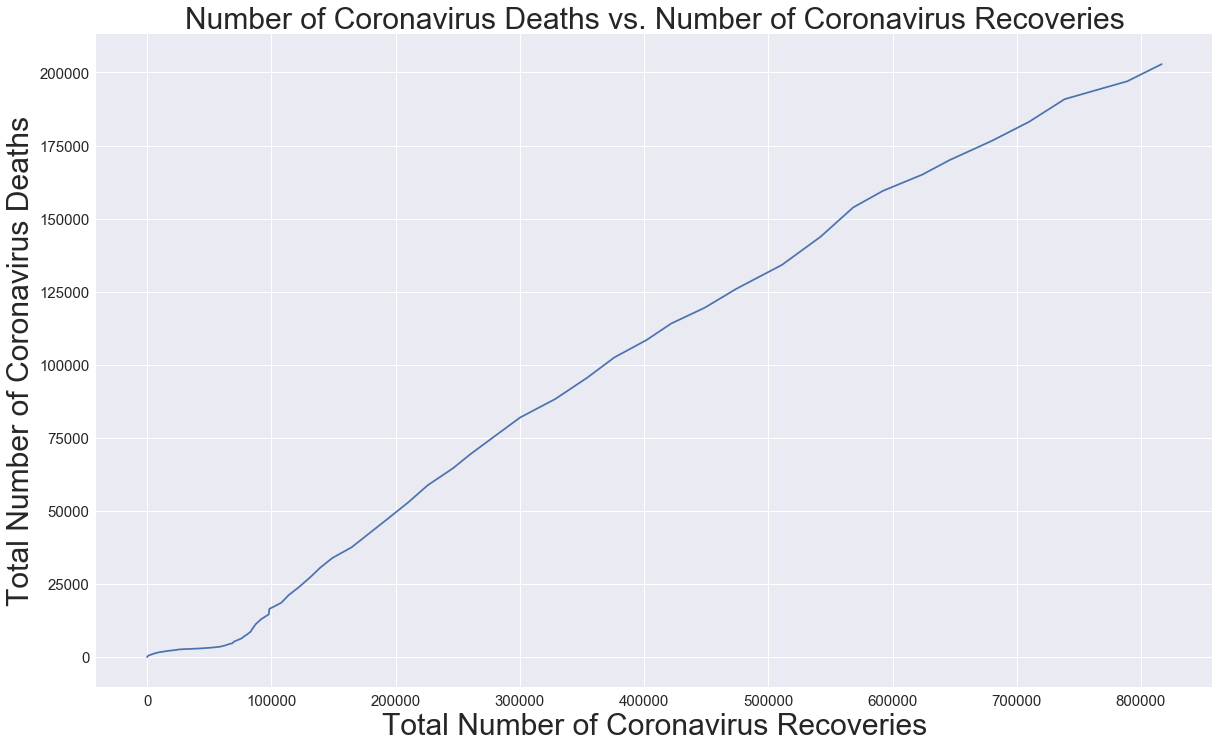

In [45]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Total Number of Coronavirus Recoveries', size=30)
plt.ylabel('Total Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()